# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 639


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "q=" + city + "&appid="+ weather_api_key + "&unit=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["temp_max"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | leningradskiy
Processing Record 3 of Set 1 | palu
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | serafimovich
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | tezpur
Processing Record 9 of Set 1 | launceston
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | tazirkah
City not found. Skipping...
Processing Record 12 of Set 1 | tabou
Processing Record 13 of Set 1 | hovd
Processing Record 14 of Set 1 | tuatapere
Processing Record 15 of Set 1 | quatre cocos
Processing Record 16 of Set 1 | saleaula
City not found. Skipping...
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | arlit
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of S

Processing Record 37 of Set 4 | bubaque
Processing Record 38 of Set 4 | piacabucu
Processing Record 39 of Set 4 | campbell river
Processing Record 40 of Set 4 | pampierstad
Processing Record 41 of Set 4 | aklavik
Processing Record 42 of Set 4 | khormuj
City not found. Skipping...
Processing Record 43 of Set 4 | soure
Processing Record 44 of Set 4 | jerico
Processing Record 45 of Set 4 | griffith
Processing Record 46 of Set 4 | san policarpo
Processing Record 47 of Set 4 | parfenyevo
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | urumqi
Processing Record 0 of Set 5 | la ronge
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | los llanos de aridane
Processing Record 3 of Set 5 | chuy
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | villa oliva
City not found. Skipping...
Processing Record 6 of Set 5 | varhaug
Processing Record 7 of Set 5 | iqaluit
Processing Record 8 of Set 5 | jos
Processing Record 9 of Set 5 | kuytun
Pr

Processing Record 25 of Set 8 | provideniya
Processing Record 26 of Set 8 | icatu
Processing Record 27 of Set 8 | oberwart
Processing Record 28 of Set 8 | belmonte
Processing Record 29 of Set 8 | langen
Processing Record 30 of Set 8 | mouila
Processing Record 31 of Set 8 | sorong
Processing Record 32 of Set 8 | safford
Processing Record 33 of Set 8 | dungarpur
Processing Record 34 of Set 8 | taoudenni
Processing Record 35 of Set 8 | gwanda
Processing Record 36 of Set 8 | longyearbyen
Processing Record 37 of Set 8 | dolores
Processing Record 38 of Set 8 | wyndham
Processing Record 39 of Set 8 | mkushi
Processing Record 40 of Set 8 | lorengau
Processing Record 41 of Set 8 | shubarshi
Processing Record 42 of Set 8 | biograd na moru
Processing Record 43 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 44 of Set 8 | surt
Processing Record 45 of Set 8 | blind river
Processing Record 46 of Set 8 | isangel
Processing Record 47 of Set 8 | puerto madryn
Processing Record 48 of

Processing Record 14 of Set 12 | boende
Processing Record 15 of Set 12 | magistralnyy
Processing Record 16 of Set 12 | mersing
Processing Record 17 of Set 12 | resistencia
Processing Record 18 of Set 12 | xining
Processing Record 19 of Set 12 | puerto ayacucho
Processing Record 20 of Set 12 | samarai
Processing Record 21 of Set 12 | san jose
Processing Record 22 of Set 12 | ahipara
Processing Record 23 of Set 12 | waddan
Processing Record 24 of Set 12 | vestmanna
Processing Record 25 of Set 12 | nguiu
City not found. Skipping...
Processing Record 26 of Set 12 | puerto leguizamo
Processing Record 27 of Set 12 | namtsy
Processing Record 28 of Set 12 | san rafael del sur
Processing Record 29 of Set 12 | bansud
Processing Record 30 of Set 12 | sharjah
Processing Record 31 of Set 12 | atasu
Processing Record 32 of Set 12 | puerto cortes
City not found. Skipping...
Processing Record 33 of Set 12 | veraval
Processing Record 34 of Set 12 | ahuimanu
Processing Record 35 of Set 12 | elko
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,284.96,284.96,0,1.54,AR,1675532014
1,leningradskiy,69.3833,178.4167,240.35,240.35,99,2.05,RU,1675532284
2,palu,-0.8917,119.8707,297.12,297.12,99,1.14,ID,1675532290
3,puerto ayora,-0.7393,-90.3518,303.13,303.13,29,3.13,EC,1675532292
4,serafimovich,49.5786,42.7360,270.08,270.08,100,4.01,RU,1675532294


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,284.96,284.96,0,1.54,AR,1675532014
1,leningradskiy,69.3833,178.4167,240.35,240.35,99,2.05,RU,1675532284
2,palu,-0.8917,119.8707,297.12,297.12,99,1.14,ID,1675532290
3,puerto ayora,-0.7393,-90.3518,303.13,303.13,29,3.13,EC,1675532292
4,serafimovich,49.5786,42.7360,270.08,270.08,100,4.01,RU,1675532294


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

TypeError: 'str' object is not callable

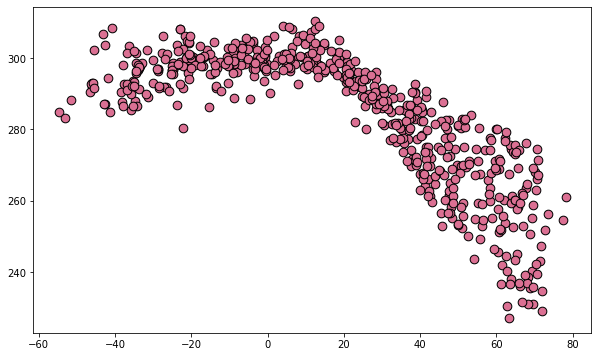

In [46]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
chart=plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black",color="#DB7093",s=75)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City latitude vs Max Temperature")            
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

TypeError: 'str' object is not callable

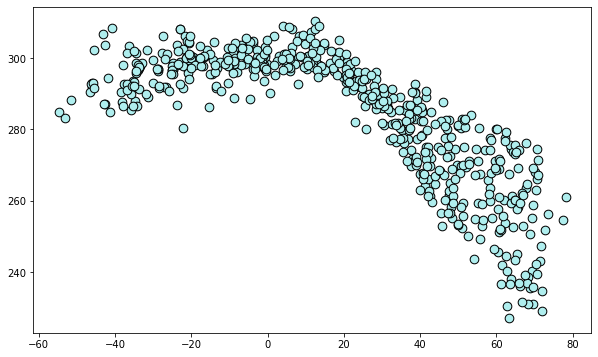

In [47]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
chart2=plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor="black",color="#AFEEEE",s=75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City latitude vs Humidity")    

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

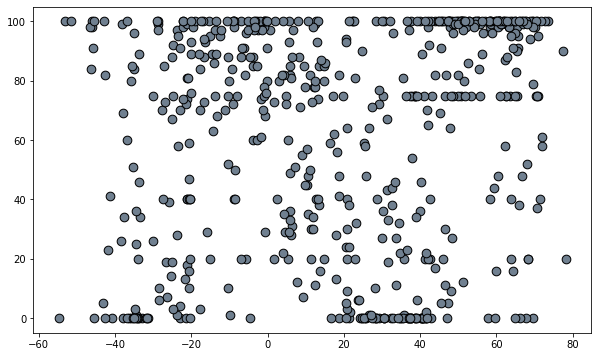

In [44]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
chart3=plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolor="black",color="#708090",s=75)

# Incorporate the other graph properties
plt.xlabel=("Latitude")
plt.ylabel=("Cloudiness")
plt.title=("City latitude vs Cloudiness")   

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

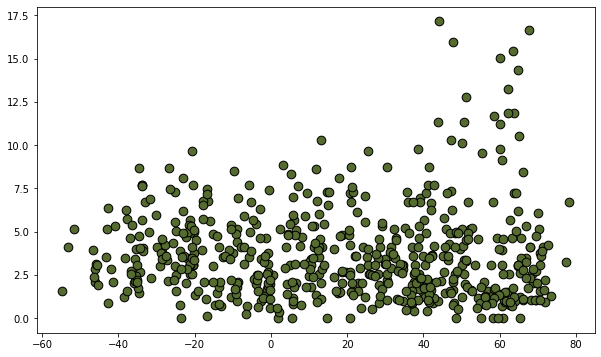

In [45]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
chart4=plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolor="black",color="#556B2F",s=75)

# Incorporate the other graph properties
plt.xlabel=("Latitude")
plt.ylabel=("Wind Speed")
plt.title=("City latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE